In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


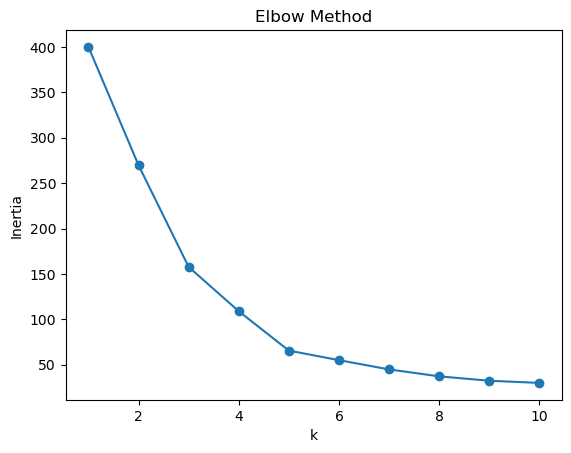

In [47]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, "o-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [48]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k} → Silhouette Score = {score:.2f}")


k=2 → Silhouette Score = 0.40
k=3 → Silhouette Score = 0.47
k=4 → Silhouette Score = 0.49
k=5 → Silhouette Score = 0.55
k=6 → Silhouette Score = 0.51
k=7 → Silhouette Score = 0.50
k=8 → Silhouette Score = 0.46
k=9 → Silhouette Score = 0.46
k=10 → Silhouette Score = 0.44


In [49]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


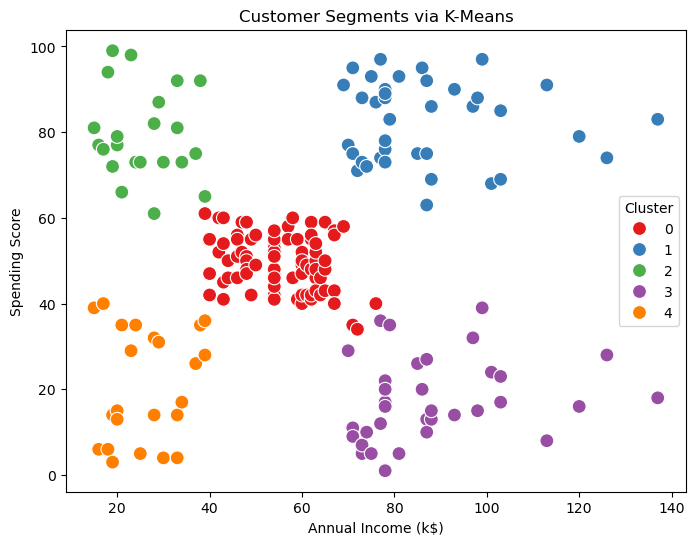

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments via K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


In [51]:
cluster_avg = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print(cluster_avg)


         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391


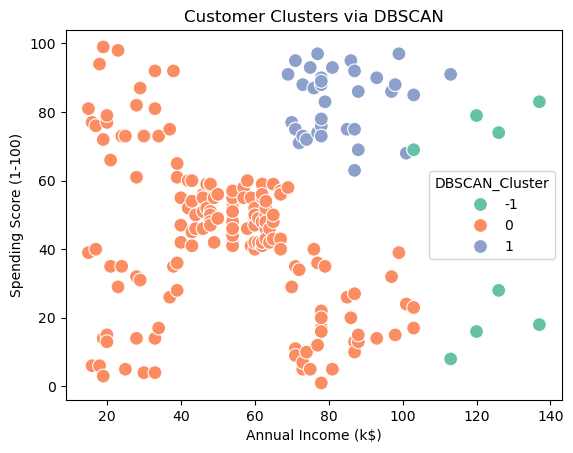

In [52]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set2', s=100)
plt.title('Customer Clusters via DBSCAN')
plt.show()
